In [1]:
import numpy as np
import pandas as pd
from scipy import optimize

**Exercises**
$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

Define this function:

In [2]:
def u(x1,x2,alpha=0.5,beta=1):
    return (alpha*x1**(-beta) + (1-alpha)*x2**(-beta))**(-1/beta)

In [3]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `print_table(x1_vec,x2_vec)` to print values of `u(x1,x2)` in the table form shown below.

In [4]:
def print_table(x1_vec,x2_vec):
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' 
    text += '\n' # line shift
    
    # c. body
    for i, x1 in enumerate(x1_vec):
        if i > 0:
            text += '\n' # line shift
        text += f'{i:3d} ' # left header
        for j, x2 in enumerate(x2_vec):
            text += f'{u(x1,x2):6.2f}'
    
    # d. print
    print(text) 
print_table(x1_vec,x2_vec)

        0     1     2     3     4
  0   1.05  1.16  1.44  1.48  1.57
  1   1.16  1.30  1.66  1.71  1.83
  2   1.44  1.66  2.30  2.40  2.64
  3   1.48  1.71  2.40  2.50  2.77
  4   1.57  1.83  2.64  2.77  3.10


**Ploting use matplotlib** 

Reproduce the figure below of $u(x_1,x_2)$ using the `meshgrid` function from _numpy_ and the `plot_surface` function from _matplotlib_. 

In [5]:
# evaluate utility function
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij')
u_grid = u(x1_grid,x2_grid)

# import plot modules
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

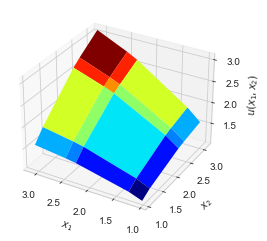

In [6]:
fig =plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_grid,x2_grid,u_grid,cmap=cm.jet)

ax.set_ylabel("$x_2$")
ax.set_xlabel("$x_1$")
ax.set_zlabel("$u(x_1,x_2)$")


ax.invert_xaxis()

Next we want to optimize a function, namely:

$$
\min_x  f(x) = \min_x \sin(x) + 0.05 \cdot x^2
$$

best with loop is           -0.88366802 at x = -1.51515152
best with scipy.optimize is -0.88786283 at x = -1.42756250


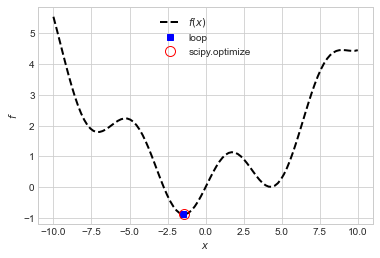

In [9]:
def f(x):
    return np.sin(x)+0.05*x**2

N = 100
x_vec = np.linspace(-10,10,N) # Creates 100 numbers between -10 and 10 on a line 
f_vec = np.empty(N)  # Create a 100x1 empty matrix

f_best = np.inf # initial maximum
x_best = np.nan # not-a-number


for i,x in enumerate(x_vec):
    f_now =f_vec[i] = f(x)
    if f_now < f_best:
        x_best = x
        f_best = f_now

        
x_guess = [0]      
objective_function = lambda x: f(x[0])
res = optimize.minimize(objective_function, x_guess, method='Nelder-Mead')
x_best_scipy = res.x[0]
f_best_scipy = res.fun


# d. print
print(f'best with loop is           {f_best:.8f} at x = {x_best:.8f}')
print(f'best with scipy.optimize is {f_best_scipy:.8f} at x = {x_best_scipy:.8f}')

# e. figure
import matplotlib.pyplot as plt
fig = plt.figure() # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1)

ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')
ax.plot(x_best,f_best,ls='',marker='s',color='blue',label='loop')
ax.plot(x_best_scipy,f_best_scipy,ls='',marker='o',
        markersize=10,markerfacecolor='none',
        markeredgecolor='red',label='scipy.optimize')

ax.set_xlabel('$x$')
ax.set_ylabel('$f$')
ax.grid(True)
ax.legend(loc='upper center');
